Dünya içilebilir su tahmin programı

#### dataseti çekelim

yapılacak işlemler:

- preprocessing : missing value problem , train test split  ,normalizason

- modelling :  decision tree and random forest

- evaluations : desicion tree visulation 

- hyper parameter tunning : random forest

In [35]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adityakadiwal/water-potability")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\canoz\.cache\kagglehub\datasets\adityakadiwal\water-potability\versions\3


In [36]:
import pandas as pd #lineer algebra
import numpy as np #data processing
import seaborn as sbn #visualization görselleştirme
import matplotlib.pyplot as plt #visualization görselleştirme
import plotly.express as px


import missingno as msno #kayıp veri analizi


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV ,RepeatedStratifiedKFold ,train_test_split
from sklearn.metrics import precision_score,confusion_matrix

from sklearn import tree

In [37]:
df=pd.read_csv("water_potability.csv")

In [38]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [39]:
describe =df.describe() #veriler ile ilgili temel özellikler 
describe

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [40]:
df.info() #kaç tane satır stun var ve bunlar hangi veri tipinde kaç tanesi non null 
#yani değere sahip olan kaç tane veri var 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


#### bağımlı değişken analizi (dependent variable analysis)

In [41]:
d =pd.DataFrame(df["Potability"].value_counts())
d

#içilebilir 1278 adet
#içilemez 1998 adet

,count
Potability,
0,1998
1,1278


In [42]:
#  fig=px.pie(d, values="Potability", names=["Not Potable","Potable"],hole=0.35,opacity=0.8,
#               labels={"label":"Potability","Potability":"Number of Samples"})  

In [43]:


# fig.update_layout(title = dict(text= "Pie Chart of Potability Feature")) #tablo başlığımız
# fig.update_traces(textposition= "outside",textinfo="percent+Label")  #figure üzerine gelindiğinde açılacak yazı
# fig.show() #figürü aç


# fig.write_html("icilebilirSu.html")  #figürü kaydetme

##korelasyon analizi 

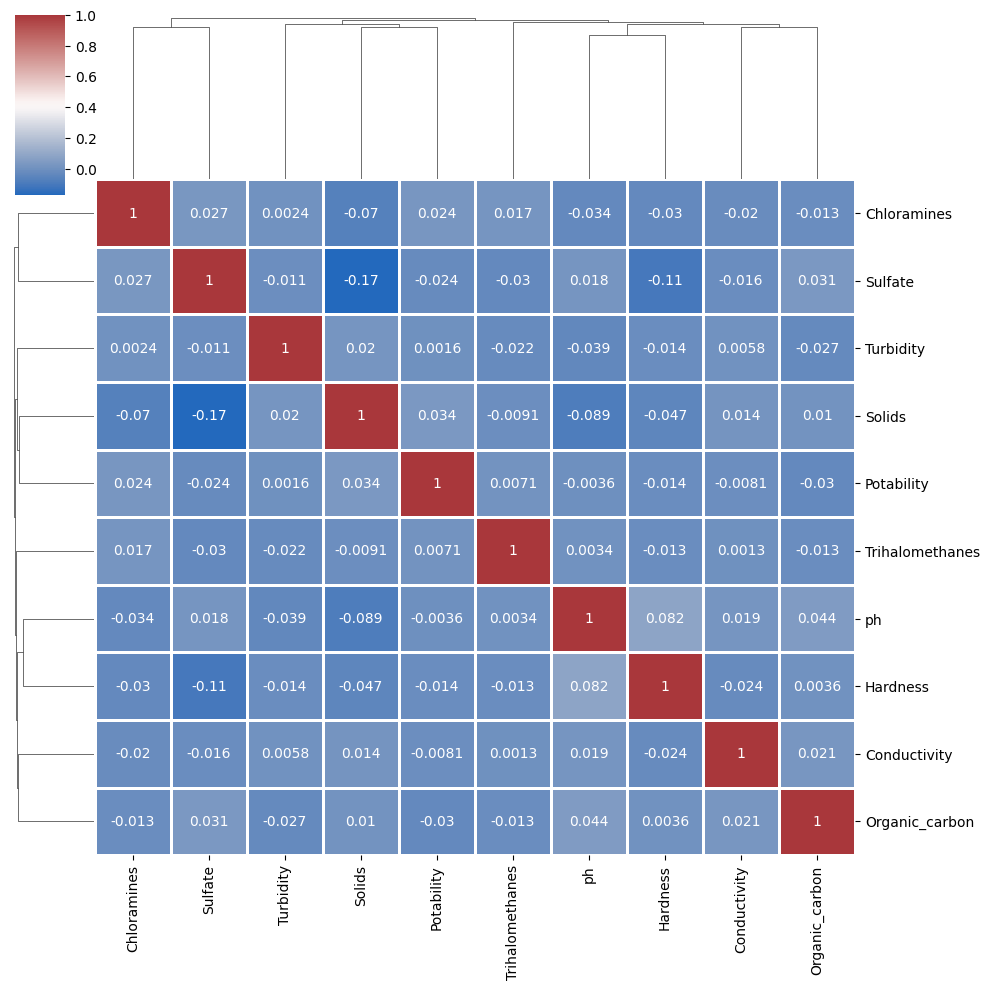

In [44]:
sbn.clustermap(df.corr(), cmap="vlag" ,dendrogram_ratio=(0.1,0.2)  ,annot=True , linewidths=0.8, figsize=(10,10))
plt.show()
 # potability de yüksek korelasyonlu öne çıkan özellik yok hepsi eşit korelasyonlu gibi  

### distribution of features  verilerin dağılımı 

In [45]:
non_potable = df.query("Potability == 0")  #içilemez su verileri alıyoruz

potable = df.query("Potability == 1")  #içilebilir su verileri

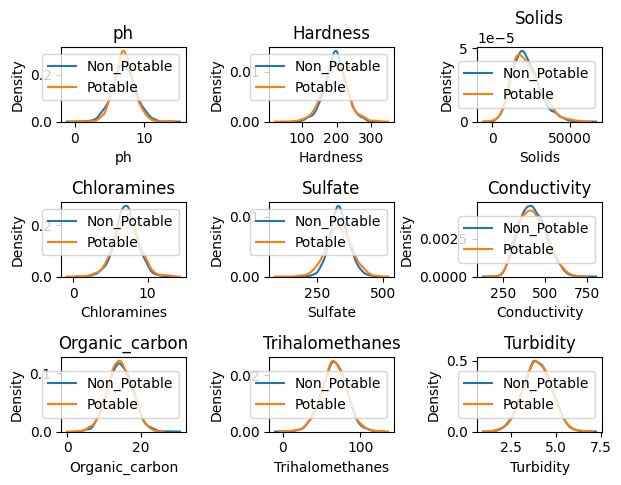

In [46]:
plt.figure()
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3,3,ax+1)
    plt.title(col)
    sbn.kdeplot(x= non_potable[col],label="Non_Potable")
    sbn.kdeplot(x= potable[col],label="Potable" )
    plt.legend()

plt.tight_layout()
    



### missing value analizi 

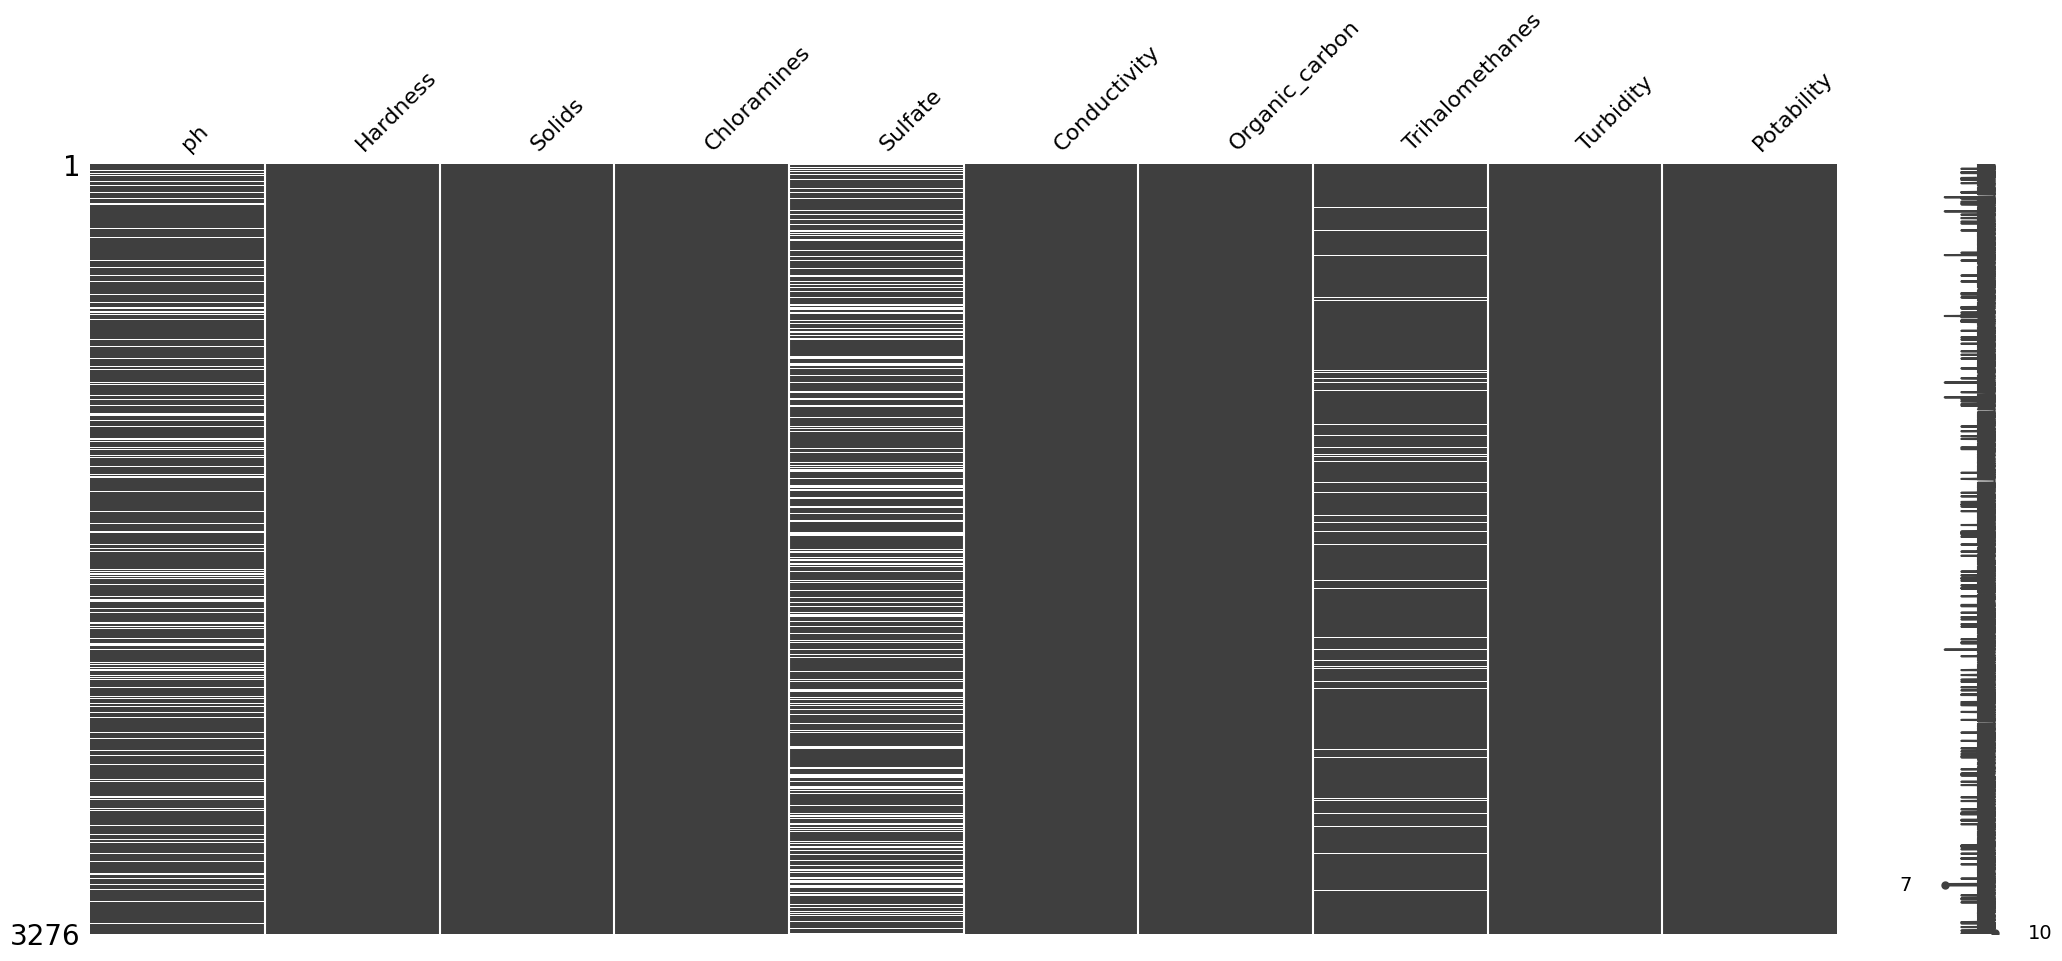

In [47]:
msno.matrix(df)
plt.show() #missing valueleri gösterir tabloda çizgi şeklinde gösterir

#### veri ön işleme


kaç tane null değer var 

In [48]:
print(df.isnull().sum())  #her veride kaç tane null değer var onu buluyoruz 

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [49]:
#dağılım verimizden yola çıkarak missing valueleri ortalama değerler ile doldurabiliriz.

Null değerleri ortalama ile doldurma 

In [50]:
df["ph"] = df["ph"].fillna(value=df["ph"].mean())


df["Sulfate"] = df["Sulfate"].fillna(value=df["Sulfate"].mean())
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(value=df["Trihalomethanes"].mean())

#burada içilebilir ph ortalamasını içilebilir null değerlerin yerine 
# içilemez satırda null yerlerine de içilemez ph ortalamasını koymak mantıklı olur 



In [51]:
print(df.isnull().sum())  #her veride kaç tane null  kontrol edelim tekrardan

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


train test split

In [52]:
y = df["Potability"].values # target değerleri
x = df.drop(["Potability"],axis=1).values # indeperndent değerleri



In [53]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)


#minmax normalizasyon 

In [54]:
from sklearn.preprocessing import MinMaxScaler



In [55]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)



# model oluşturma 

In [ ]:
models=[("DTC",DecisionTreeClassifier(max_depth=3)), # 3 aşamalı derinlik görselleştirme de kolay ağaçta 
                # ("KNN",KNeighborsClassifier()), # KNN ile sınıflandırma
                # ("NB",GaussianNB()), # Gaussian Naive Bayes
                # ("SVM",SVC()), # SVM ile sınıflandırma
                # ("DT",DecisionTreeClassifier()), # 2 aşamalı derinlik görselleştirme
                # ("GBC",GradientBoostingClassifier()), # Gradient Boosting Classifier
                # ("XGB",XGBClassifier()), # XGBoost
                # ("LR",LogisticRegression()), # Logistic Regression
                # ("GB",GradientBoostingClassifier()) , # Gradient

        ("RF",RandomForestClassifier())]

In [57]:
finalResult=[] #score listesi

cmList=[] #confusion matrix listesi

for name , model in models:
    model.fit(x_train,y_train) # model eğitiliyor 

    model_results = model.predict(x_test) #predict işlemi yapılıyor

    score= precision_score(y_test,model_results) #precision score hesaplanıyor
    finalResult.append( (name,score))

    cm=confusion_matrix(y_test,model_results) #confusion matrix hesaplanıyor
    cmList.append((name,cm))


In [58]:
print(finalResult)

[('DTC', 0.72), ('RF', 0.6555023923444976)]


bu tablo bize şunu anlatıyor
610 tane veri 0 mış bizde 0 sonucunu üretmişiz 7 tane 0 mış 1 değerini üretmişiz
348 tane 1 miş 1 sonucunu vermişiz 18 tanesini 0 demiş 

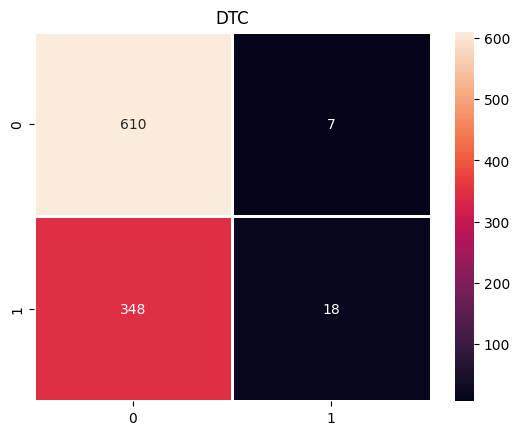

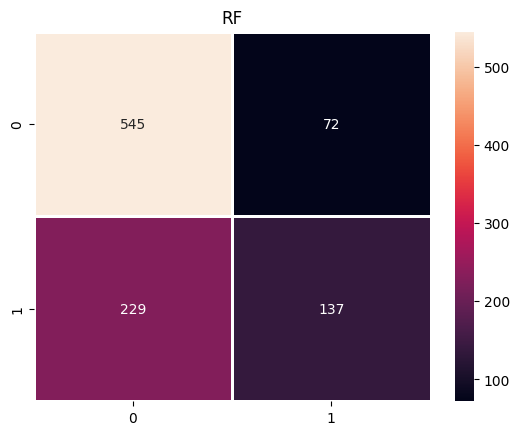

In [59]:

for name,i in cmList:
    plt.figure()
    sbn.heatmap(i , annot=True , fmt=".0f",  linewidths=0.8)
    plt.title(name)
    plt.show()

    

### görselleştirme işlemleri 

modellerimiz 2 tane var  DTC VE RF üstte tanımladık  models olarak 

In [61]:
models[0]

('DTC', DecisionTreeClassifier(max_depth=3))

In [62]:
models[1]

('RF', RandomForestClassifier())

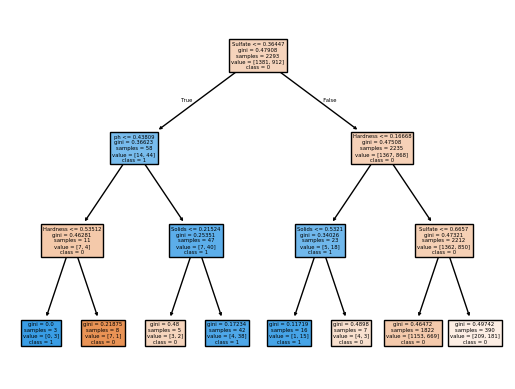

In [65]:
dt_clf=models[0][1] #desicionTreeClassifier e ulaştık 

plt.Figure(figsize=(25,20))
tree.plot_tree(dt_clf,feature_names=df.columns.tolist()[:-1],
                                # df.columns.tolist()[:-1]    # potability i almadık sadece feature leri aldık 

               class_names=["0","1"],
               filled=True,
               precision=5 # virgülden sonraki 5 basamakları yazdırıyor
               )
plt.show()







In [ ]:
#bu ağaç yardımı ile alınacak yeni veri her seferinde sağa sola giderek su kalitesi değerini hesaplayacağız